## MTN 주가 데이터 세트
MTN 가나의 2018-2023 주가 예측.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-dark')
sns.set_context('notebook')
sns.set_palette('BrBG')
plt.rcParams.update(
    {
        'axes.facecolor':'oldlace',
        'font.size':11,
        'axes.labelsize':11,
        'axes.linewidth':1.2,
        'ytick.labelsize':11,
        'xtick.labelsize':11,
        'lines.linewidth': 1.5,
        'text.usetex':False         
    }
)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/leejieun/kaggle-notebooks/datasets/redpen12/mtn-gh-stock-price-dataset/Daily Shares  ETFs 2023.csv', parse_dates=['Daily Date'], usecols=[0, 7],dayfirst=True)
df.head()

,Daily Date,Closing Price - VWAP (GH¢)
0,2023-11-30,1.4
1,2023-11-29,1.4
2,2023-11-28,1.4
3,2023-11-27,1.4
4,2023-11-24,1.4


In [5]:
df.columns= ['date', 'value']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1287 non-null   datetime64[ns]
 1   value   1287 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.2 KB


In [7]:
df.head()

,date,value
0,2023-11-30,1.4
1,2023-11-29,1.4
2,2023-11-28,1.4
3,2023-11-27,1.4
4,2023-11-24,1.4


In [8]:
df.shape

(1287, 2)

In [9]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day_of_week'] = df.date.dt.day_of_week

In [10]:
df.head()

,date,value,year,month,day_of_week
0,2023-11-30,1.4,2023,11,3
1,2023-11-29,1.4,2023,11,2
2,2023-11-28,1.4,2023,11,1
3,2023-11-27,1.4,2023,11,0
4,2023-11-24,1.4,2023,11,4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


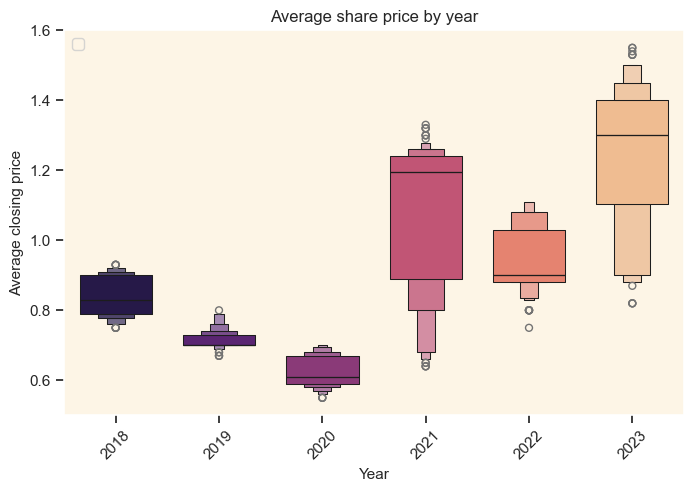

In [11]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
sns.boxenplot(data=df, y='value', x='year', ax= ax , palette='magma', width=0.7)
plt.xticks(rotation=45)
plt.title('Average share price by year')
ax.set(ylabel='Average closing price', xlabel='Year')
ax.legend(loc=2, frameon=True)
plt.show()

In [16]:
import calendar

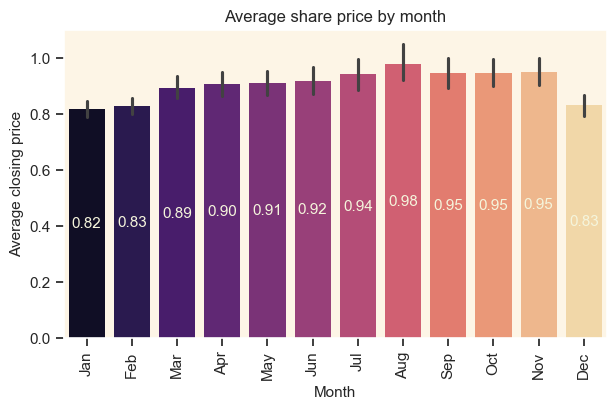

In [17]:
fig = plt.figure(figsize=(7,4))
ax= plt.axes()
months = list(calendar.month_abbr)[1:]
sns.barplot(data=df, y='value', x='month', ax=ax, palette='magma')
plt.xticks(rotation=90)
plt.title('Average share price by month')
ax.set(ylabel='Average closing price', xlabel='Month', xticklabels=months)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='center', color='beige')
plt.show()

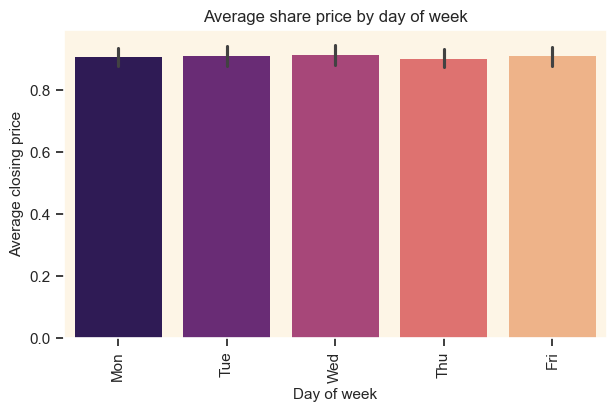

In [19]:
fig = plt.figure(figsize=(7,4))
ax = plt.axes()
days = list(calendar.day_abbr)[:-2]
sns.barplot(data=df, y='value', x='day_of_week', ax=ax, palette='magma')
plt.xticks(rotation=90)
plt.title('Average share price by day of week')
ax.set(ylabel='Average closing price', xlabel='Day of week', xticklabels=days)
plt.show()

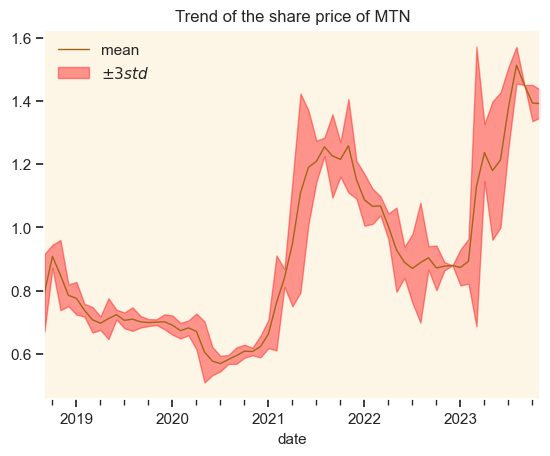

In [20]:
df.set_index('date', inplace=True)

weekly_data = df.resample('M')['value'].agg(['mean', 'std'])
weekly_data.plot(y='mean', marker=None, linewidth=1)
margin =3*weekly_data['std']
plt.fill_between(
    weekly_data.index,
    y1=weekly_data['mean'] - margin,
    y2=weekly_data['mean'] + margin,
    color='r',
    alpha=0.4,
    label='$\pm3 std$'
)

plt.legend()
plt.title('Trend of the share price of MTN')
plt.show()

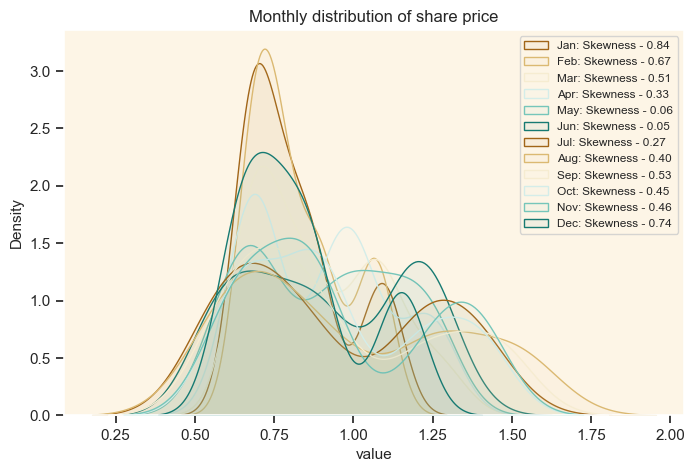

In [22]:
groups = df.groupby('month')['value']

plt.figure(figsize=(8,5))
for i, group in groups:
    sns.kdeplot(group, fill=True, alpha=0.05, label=f'{months[i-1]}: Skewness - {group.skew():.2f}')
    plt.title('Monthly distribution of share price')
    plt.legend(frameon=True, fontsize=8.5, facecolor='inherit')
plt.show()